In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, Lars, ElasticNet
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
sns.set()

In [2]:
tr_data=pd.read_csv('train.csv')
ts_data=pd.read_csv('test.csv')

train=tr_data.drop(['SalePrice'],axis=1)
target=tr_data['SalePrice']
data=pd.concat([train,ts_data])
data.shape


(2919, 80)

<AxesSubplot:>

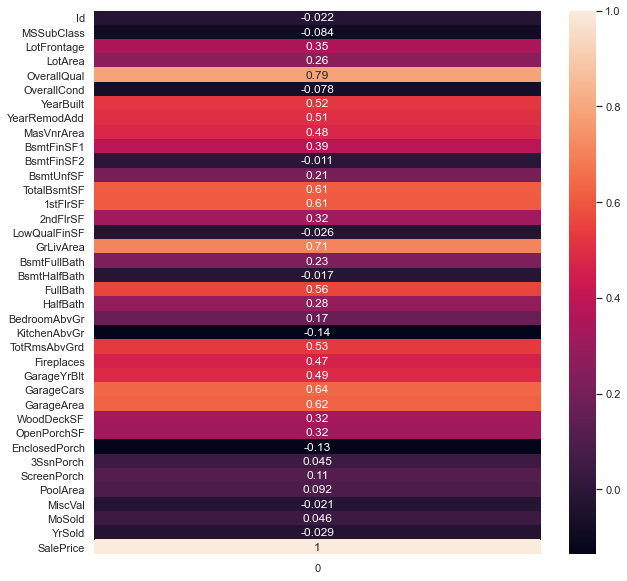

In [3]:
#correlation of sale price with all dependent veriable
SalePrice=tr_data['SalePrice']
corrSalePrice=tr_data.corrwith(SalePrice,axis=0)
corrSalePrice1=pd.DataFrame(corrSalePrice)


plt.figure(figsize=(10,10))
sns.heatmap(corrSalePrice1,vmax=1,annot=True)

In [4]:
tr_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
#considering only highly correlated veriable
df_train=tr_data[['LotFrontage','OverallQual','YearBuilt','YearRemodAdd','MasVnrType','BsmtFinType1','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','SalePrice']]
df_test=ts_data[['LotFrontage','OverallQual','YearBuilt','YearRemodAdd','MasVnrType','BsmtFinType1','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea']]



<AxesSubplot:>

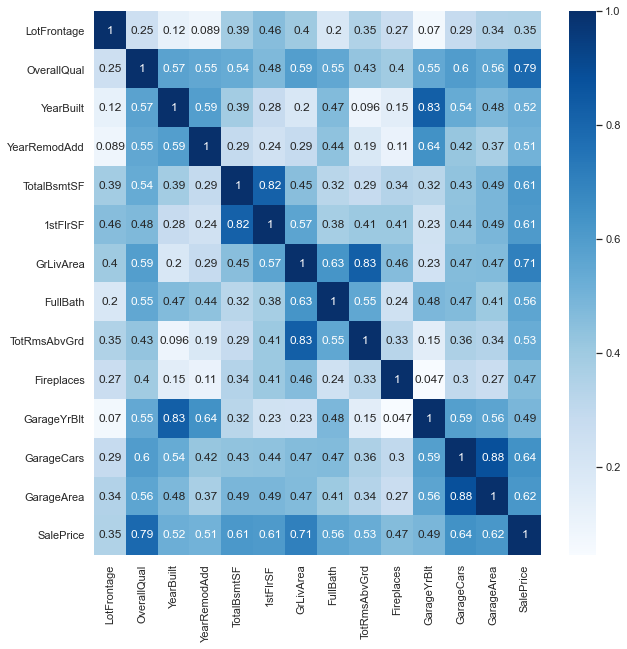

In [6]:
df_train.corr()

plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(),vmax=1,annot=True,cmap='Blues')



In [7]:
df_train.replace({'None':np.nan},inplace=True)

C:\Users\eshak\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [8]:
df_train['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [9]:
#dealing with missing values.
df_train.isnull().sum()

LotFrontage     259
OverallQual       0
YearBuilt         0
YearRemodAdd      0
MasVnrType      872
BsmtFinType1     37
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
SalePrice         0
dtype: int64

In [10]:
df_train.median()

LotFrontage         69.0
OverallQual          6.0
YearBuilt         1973.0
YearRemodAdd      1994.0
TotalBsmtSF        991.5
1stFlrSF          1087.0
GrLivArea         1464.0
FullBath             2.0
TotRmsAbvGrd         6.0
Fireplaces           1.0
GarageYrBlt       1980.0
GarageCars           2.0
GarageArea         480.0
SalePrice       163000.0
dtype: float64

In [13]:
df_train=df_train.fillna(df_train.median())
df_train.isnull().sum()
df_test=df_test.fillna(df_test.median())
df_train['MasVnrType'].value_counts()

BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [14]:
df_train[df_train.isnull().any(axis=1)]
df_train['MasVnrType']=df_train['MasVnrType'].fillna('BrkFace')


In [15]:
df_train=df_train.drop(['MasVnrType','BsmtFinType1'],axis=1)
df_test=df_test.drop(['MasVnrType','BsmtFinType1'],axis=1)
df_train



,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,65.0,7,2003,2003,856,856,1710,2,8,0,2003.0,2,548,208500
1,80.0,6,1976,1976,1262,1262,1262,2,6,1,1976.0,2,460,181500
2,68.0,7,2001,2002,920,920,1786,2,6,1,2001.0,2,608,223500
3,60.0,7,1915,1970,756,961,1717,1,7,1,1998.0,3,642,140000
4,84.0,8,2000,2000,1145,1145,2198,2,9,1,2000.0,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,1999,2000,953,953,1647,2,7,1,1999.0,2,460,175000
1456,85.0,6,1978,1988,1542,2073,2073,2,7,2,1978.0,2,500,210000
1457,66.0,7,1941,2006,1152,1188,2340,2,9,2,1941.0,1,252,266500
1458,68.0,5,1950,1996,1078,1078,1078,1,5,0,1950.0,1,240,142125


In [16]:
df_train.isnull().sum()
#df1.isnull().sum()


LotFrontage     0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

In [17]:
df_test

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
0,80.0,5,1961,1961,882.0,896,896,1,5,0,1961.0,1.0,730.0
1,81.0,6,1958,1958,1329.0,1329,1329,1,6,0,1958.0,1.0,312.0
2,74.0,5,1997,1998,928.0,928,1629,2,6,1,1997.0,2.0,482.0
3,78.0,6,1998,1998,926.0,926,1604,2,7,1,1998.0,2.0,470.0
4,43.0,8,1992,1992,1280.0,1280,1280,2,5,0,1992.0,2.0,506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,4,1970,1970,546.0,546,1092,1,5,0,1979.0,0.0,0.0
1455,21.0,4,1970,1970,546.0,546,1092,1,6,0,1970.0,1.0,286.0
1456,160.0,5,1960,1996,1224.0,1224,1224,1,7,1,1960.0,2.0,576.0
1457,62.0,5,1992,1992,912.0,970,970,1,6,0,1979.0,0.0,0.0


In [18]:
df_train['log_SalePrice']=np.log(df_train['SalePrice'])
del df_train['SalePrice']

x_train=df_train.drop(['log_SalePrice'],axis=1)
target=df_train['log_SalePrice']
df_train.to_csv('Real_satePrice.csv')

In [154]:
from sklearn.preprocessing import RobustScaler
rb_scaler=RobustScaler()

x_train_rb=pd.DataFrame(rb_scaler.fit_transform(x_train),columns=x_train.columns)
x_test_rb=pd.DataFrame(rb_scaler.fit_transform(df_test),columns=df_test.columns)


In [157]:
x_train_rb

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
0,-0.210526,0.5,0.652174,0.243243,-0.269652,-0.453608,0.380070,0.0,1.0,-1.0,0.589744,0.0,0.281573
1,0.578947,0.0,0.065217,-0.486486,0.538308,0.343643,-0.312090,0.0,0.0,0.0,-0.102564,0.0,-0.082816
2,-0.052632,0.5,0.608696,0.216216,-0.142289,-0.327933,0.497489,0.0,0.0,0.0,0.538462,0.0,0.530021
3,-0.473684,0.5,-1.260870,-0.648649,-0.468657,-0.247423,0.390885,-1.0,0.5,0.0,0.461538,1.0,0.670807
4,0.789474,1.0,0.586957,0.162162,0.305473,0.113893,1.134029,0.0,1.5,0.0,0.512821,1.0,1.474120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.368421,0.0,0.565217,0.162162,-0.076617,-0.263132,0.282735,0.0,0.5,0.0,0.487179,0.0,-0.082816
1456,0.842105,0.0,0.108696,-0.162162,1.095522,1.936181,0.940904,0.0,0.5,1.0,-0.051282,0.0,0.082816
1457,-0.157895,0.5,-0.695652,0.324324,0.319403,0.198331,1.353418,0.0,1.5,1.0,-1.000000,-1.0,-0.944099
1458,-0.052632,-0.5,-0.500000,0.054054,0.172139,-0.017673,-0.596369,-1.0,-0.5,-1.0,-0.769231,-1.0,-0.993789


In [159]:
train_concat=pd.concat([x_train_rb,x_test_rb])
train_concat

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
0,-0.210526,0.5,0.652174,0.243243,-0.269652,-0.453608,0.380070,0.0,1.0,-1.0,0.589744,0.0,0.281573
1,0.578947,0.0,0.065217,-0.486486,0.538308,0.343643,-0.312090,0.0,0.0,0.0,-0.102564,0.0,-0.082816
2,-0.052632,0.5,0.608696,0.216216,-0.142289,-0.327933,0.497489,0.0,0.0,0.0,0.538462,0.0,0.530021
3,-0.473684,0.5,-1.260870,-0.648649,-0.468657,-0.247423,0.390885,-1.0,0.5,0.0,0.461538,1.0,0.670807
4,0.789474,1.0,0.586957,0.162162,0.305473,0.113893,1.134029,0.0,1.5,0.0,0.512821,1.0,1.474120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-2.555556,-1.0,-0.062500,-0.536585,-0.850000,-1.047151,-0.563380,-1.0,-0.5,0.0,0.000000,-2.0,-1.860465
1455,-2.555556,-1.0,-0.062500,-0.536585,-0.850000,-1.047151,-0.563380,-1.0,0.0,0.0,-0.222222,-1.0,-0.751938
1456,5.166667,-0.5,-0.270833,0.097561,0.453846,0.284872,-0.344656,-1.0,0.5,1.0,-0.469136,0.0,0.372093
1457,-0.277778,-0.5,0.395833,0.000000,-0.146154,-0.214145,-0.765534,-1.0,0.0,0.0,0.000000,-2.0,-1.860465


In [ ]:
#plotting all veriable with sale price to check linear relation

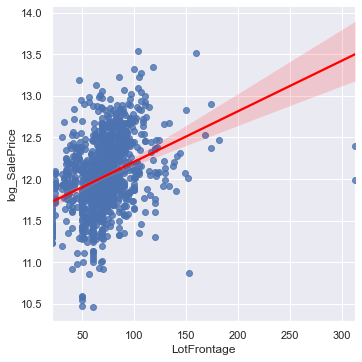

In [164]:
sns.lmplot(x='LotFrontage',y='log_SalePrice',data=df_train,fit_reg=True,line_kws={'color':'red'})

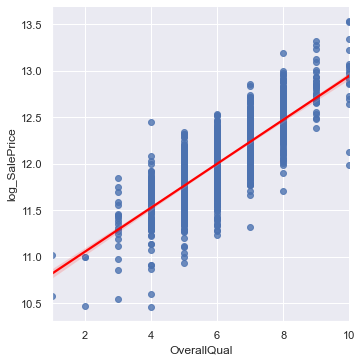

In [165]:
sns.lmplot(x='OverallQual',y='log_SalePrice',data=df_train,fit_reg=True,line_kws={'color':'red'})

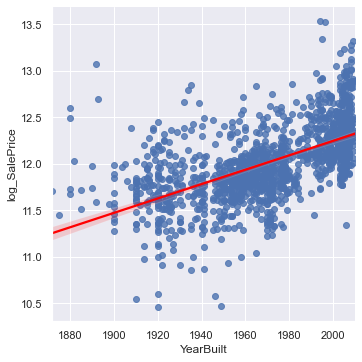

In [166]:
sns.lmplot(x='YearBuilt',y='log_SalePrice',data=df_train,fit_reg=True,line_kws={'color':'red'})

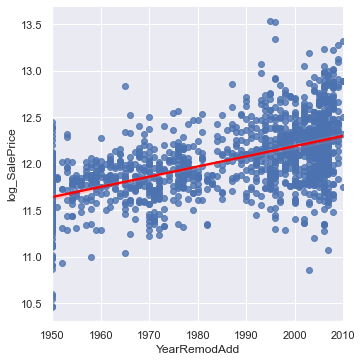

In [167]:
sns.lmplot(x='YearRemodAdd',y='log_SalePrice',data=df_train,fit_reg=True,line_kws={'color':'red'})

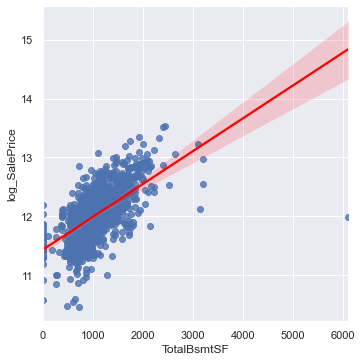

In [168]:
sns.lmplot(x='TotalBsmtSF',y='log_SalePrice',data=df_train,fit_reg=True,line_kws={'color':'red'})

In [ ]:
#above all plot indicate that Linear ML model could be best fit model

In [169]:
#importing all linear model to cheack higest accuracy
from sklearn.linear_model import LinearRegression, Ridge, Lasso, Lars, ElasticNet
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [174]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_train_rb,target,test_size=0.2,random_state=20)

In [171]:
models={ 'Linear':LinearRegression(),
          'Ridge':Ridge(alpha=(1/2*10),max_iter=1000,random_state=198),
           'Lasso':Lasso(alpha=1,max_iter=1000,warm_start=True,random_state=198),
           'Lars':Lars(),
           'ElasticNet':ElasticNet(alpha=1,max_iter=1000,warm_start=True,random_state=198),
              'SVR': SVR(kernel='rbf', 
               gamma= 'auto',
               C=10,
               max_iter= 10000),
                'NuSVR':NuSVR(kernel='rbf', 
               gamma= 'auto',
               C=10,
               max_iter= 10000),
                  'LinearSVR':LinearSVR(C=10, 
                           random_state= 198, 
                           max_iter= 10000),
                'DecisionTreeRegressor':DecisionTreeRegressor(criterion='mse',random_state=198),
                   'ExtraTreeRegressor':ExtraTreeRegressor(criterion= 'mse', 
                                    splitter= 'best', 
                                    random_state= 198),
                         'RandomForestRegressor':RandomForestRegressor(n_estimators=100,
                                           random_state=198)
        
        
    
    
    
    
    
    
    
    
}

In [179]:
n_estimators=len(models)

for index,(name,model) in enumerate(models.items()):
    model.fit(x_train1,y_train1)
    y_pred=model.predict(x_test1)
    mse = mean_squared_error(y_test1, y_pred)
    rmse = np.sqrt(mse)
    r_2 = r2_score(y_test1, y_pred)
    
    print("MSE for %s : % 8.4f" %(name, mse))
    print("RMSE for %s: % 8.4f" %(name, rmse))
    
    print("R^2 score for %s : % 8.4f" %(name, r_2))
    print('***')
    

MSE for Linear using standard scaling:   0.0230
RMSE for Linear using standard scaling:   0.1515
R^2 score for Linear using standard scaling:   0.8522
***
MSE for Ridge using standard scaling:   0.0230
RMSE for Ridge using standard scaling:   0.1516
R^2 score for Ridge using standard scaling:   0.8519
***
MSE for Lasso using standard scaling:   0.1554
RMSE for Lasso using standard scaling:   0.3943
R^2 score for Lasso using standard scaling:  -0.0012
***
MSE for Lars using standard scaling:   0.0230
RMSE for Lars using standard scaling:   0.1515
R^2 score for Lars using standard scaling:   0.8522
***
MSE for ElasticNet using standard scaling:   0.1554
RMSE for ElasticNet using standard scaling:   0.3943
R^2 score for ElasticNet using standard scaling:  -0.0012
***


C:\Users\eshak\Anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


MSE for SVR using standard scaling:   0.0284
RMSE for SVR using standard scaling:   0.1684
R^2 score for SVR using standard scaling:   0.8174
***


C:\Users\eshak\Anaconda3\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


MSE for NuSVR using standard scaling:   0.0291
RMSE for NuSVR using standard scaling:   0.1706
R^2 score for NuSVR using standard scaling:   0.8125
***


C:\Users\eshak\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


MSE for LinearSVR using standard scaling:   0.0212
RMSE for LinearSVR using standard scaling:   0.1457
R^2 score for LinearSVR using standard scaling:   0.8633
***
MSE for DecisionTreeRegressor using standard scaling:   0.0595
RMSE for DecisionTreeRegressor using standard scaling:   0.2440
R^2 score for DecisionTreeRegressor using standard scaling:   0.6166
***
MSE for ExtraTreeRegressor using standard scaling:   0.0595
RMSE for ExtraTreeRegressor using standard scaling:   0.2440
R^2 score for ExtraTreeRegressor using standard scaling:   0.6166
***
MSE for RandomForestRegressor using standard scaling:   0.0247
RMSE for RandomForestRegressor using standard scaling:   0.1572
R^2 score for RandomForestRegressor using standard scaling:   0.8409
***
